In [1]:
#Loading neccesary packages
import numpy as np          # linear algebra
import pandas as pd         # data processing
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from apyori import apriori
import warnings; warnings.simplefilter('ignore')

#Load dataset from bookcrossing
users = pd.read_csv("D:/MATA KULIAH/SEMESTER 7/PD_DAMI/Proyek/Data set/BX/BX-Users.csv", names=['User-ID', 'Location', 'Age'], encoding='latin-1', skiprows=1)
books = pd.read_csv("D:/MATA KULIAH/SEMESTER 7/PD_DAMI/Proyek/Data set/BX/BX-Books.csv", names=['ISBN', 'Book-Title' ,'Book-Author','Year-Of-Publication', 'Publisher', 'Image-Url-S', 'Image-Url-M', 'Image-Url-L'], encoding='latin-1', skiprows=1)
ratings = pd.read_csv("D:/MATA KULIAH/SEMESTER 7/PD_DAMI/Proyek/Data set/BX/BX-Book-Ratings.csv", names=['User-ID', 'ISBN', 'Book-Rating'], encoding='latin-1', skiprows=1)

In [2]:
#Print users header
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [3]:
#Print books header
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-Url-S,Image-Url-M,Image-Url-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
#Print ratings header
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [5]:
#Print users info
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [6]:
#Print books info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271379 non-null  object
 1   Book-Title           271379 non-null  object
 2   Book-Author          271378 non-null  object
 3   Year-Of-Publication  271379 non-null  int64 
 4   Publisher            271377 non-null  object
 5   Image-Url-S          271379 non-null  object
 6   Image-Url-M          271379 non-null  object
 7   Image-Url-L          271379 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.6+ MB


In [7]:
#Print ratings info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1048575 non-null  int64 
 1   ISBN         1048575 non-null  object
 2   Book-Rating  1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


# Data Preprocessing

In [8]:
#delete features that are not needed in books data
books.drop(['Image-Url-S','Image-Url-M','Image-Url-L'],axis=1,inplace=True)

In [9]:
#update all capital alphabet in dataset to lowercase and replace - with _ 
books.columns= books.columns.str.lower().str.replace('-', '_')
users.columns= users.columns.str.lower().str.replace('-', '_')
ratings.columns= ratings.columns.str.lower().str.replace('-', '_')

In [10]:
#check null value in books data
print(books.isnull().sum())

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
dtype: int64


# Checking missing value in dataset

In [11]:
#check null value of feature book_author in books data
books.loc[(books['book_author'].isnull()),:]

,isbn,book_title,book_author,year_of_publication,publisher
187700,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [12]:
jumlah = users.isnull().sum().sort_values(ascending=False)
persentase = (users.isnull().sum()/users.isnull().count()).sort_values(ascending=False)
#check missing value in users
missing_data = pd.concat([jumlah, persentase], axis=1, keys=['Jumlah', 'Pesentase Missing Data'])
missing_data['Pesentase Missing Data'] = missing_data['Pesentase Missing Data'].apply(lambda x: x * 100)

In [13]:
#check missing value in users based on Presentase missing data
missing_data.loc[missing_data['Pesentase Missing Data'] > 10]

,Jumlah,Pesentase Missing Data
age,110762,39.719857


In [14]:
#print sum of missing value in users data
print('Data yang hilang atau missing data')
round(users.isnull().sum() / len(users) * 100, 4)

Data yang hilang atau missing data


user_id      0.0000
location     0.0000
age         39.7199
dtype: float64

# Prepare Dataset

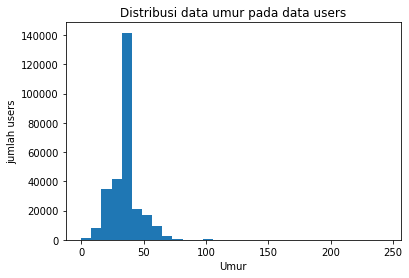

In [23]:
users.age.plot.hist(bins=30)
plt.title("Distribusi data umur pada data users")
plt.ylabel('jumlah users')
plt.xlabel('Umur');

In [24]:
#check how many rows and attributes of users data
users.shape

(278858, 3)

In [25]:
#check unique value of userid in users dataset
users['user_id'].unique()

array([     1,      2,      3, ..., 278856, 278857, 278858], dtype=int64)

In [26]:
#check unique value of age in users dataset
users['age'].unique()

array([ 35.,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  13.,
        58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,  40.,
        15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,  56.,
        67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64., 103.,
       104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,  11.,
        77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230., 239.,
        10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,  90.,
       123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97., 219.,
        86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162., 100.,
       156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199., 147.,
       168., 132., 159., 186., 152., 102., 116., 200., 115., 226., 137.,
       207., 229., 138., 109., 105., 228., 183., 20

In [144]:
#replace age >90 and age<5 in users data with nan 
users.loc[(users['age'] > 90) | (users['age'] < 5)] = np.nan
#fill nan value with mean of age
users['age'].fillna((users['age'].mean()), inplace=True)
users['age']= users['age'].astype('int64')
#Binning users into age groups using pandas.cut
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
users['age_group'] = pd.cut(users.age, range(0, 81, 10), right=False, labels=labels)
users[['age', 'age_group']].drop_duplicates()[:10]

,age,age_group
0,35,30-39
1,18,10-19
3,17,10-19
5,61,60-69
9,26,20-29
10,14,10-19
17,25,20-29
19,19,10-19
20,46,40-49
24,55,50-59


In [145]:
#check unique value of age in users dataset
users['age'].unique()

array([35, 18, 17, 61, 26, 14, 25, 19, 46, 55, 32, 24, 20, 34, 23, 51, 31,
       21, 44, 30, 57, 43, 37, 41, 54, 42, 50, 39, 53, 47, 36, 28, 13, 58,
       49, 38, 45, 62, 63, 27, 33, 29, 66, 40, 15, 60, 79, 22, 16, 65, 59,
       48, 72, 56, 67, 80, 52, 69, 71, 73, 78,  9, 64, 12, 74, 75, 76, 83,
       68, 11, 77, 70,  8,  7, 81, 10,  5,  6, 84, 82, 90, 85, 86, 87, 89,
       88], dtype=int64)

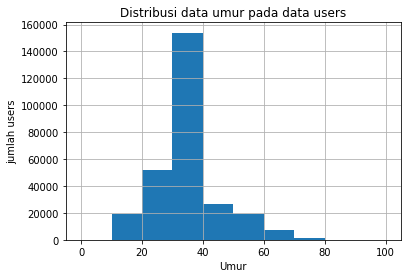

In [29]:
#create plot of age distribution
users.age.hist(bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
plt.title('Distribusi data umur pada data users')
plt.xlabel('Umur')
plt.ylabel('jumlah users')
plt.savefig('age_dist.png', bbox_inches='tight')
plt.show()

In [30]:
#check outliers of age value in users data
print('Jumlah outliers: ', sum(users['age'] > 100))

Jumlah outliers:  0


In [31]:
#check unique value of userid in users data
print('Jumlah pengguna: ',users['user_id'].nunique())

Jumlah pengguna:  277546


In [32]:
#check unique value of isbn in books data
print('Jumlah buku: ', books['isbn'].nunique())

Jumlah buku:  271379


In [33]:
#select data ISBN in books and merge with ratings
unique_ratings = ratings[ratings.isbn.isin(books.isbn)]

In [34]:
#print value in unique_ratings data
unique_ratings.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
3,276729,052165615X,3
5,276733,2080674722,0
8,276744,038550120X,7
13,276746,055356451X,0


In [35]:
#select data UserID in users and merge with ratings
rating_data = ratings[ratings.user_id.isin(users.user_id)]

In [36]:
#print value in rating_data 
rating_data.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [37]:
#check how many rows and attributes
print(rating_data.shape)
print(unique_ratings.shape)
print(books.shape)
print(users.shape)

(1042218, 3)
(179102, 3)
(271379, 5)
(278858, 4)


In [38]:
#check unique value of book_rating
unique_ratings['book_rating'].unique()

array([ 0,  3,  7,  8, 10,  9,  6,  1,  5,  4,  2], dtype=int64)

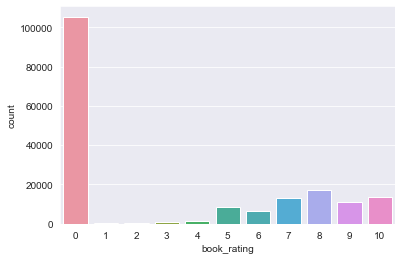

In [39]:
#create visualization of book_rating distribution
sns.set_style('darkgrid')
sns.countplot(data= unique_ratings , x='book_rating')
plt.show()

In [40]:
#feature engineering in book_rating with explicit and implicit value
ratings_explicit= unique_ratings[unique_ratings['book_rating'] != 0]
ratings_implicit= unique_ratings[unique_ratings['book_rating'] == 0]

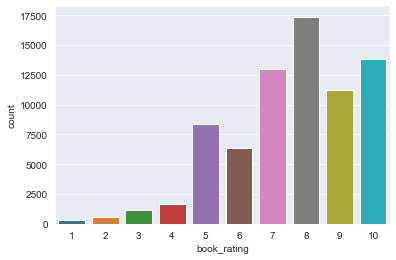

In [41]:
#create visualization ratings_explicit of book_rating distribution
sns.set_style('darkgrid')
sns.countplot(data= ratings_explicit , x='book_rating')
plt.show()

In [42]:
#check ratings_explicit head of dataframe
ratings_explicit.head()

,user_id,isbn,book_rating
3,276729,052165615X,3
8,276744,038550120X,7
23,276747,1885408226,7
27,276751,3596218098,8
44,276762,3453092007,8


In [102]:
#merge users data with ratings explicit
#grouping age are merging in user_rating data
users_rating= pd.merge(users, ratings_explicit, on='user_id', how='inner')
users_rating.head()

,user_id,location,age,age_group,isbn,book_rating
0,8.0,"timmins, ontario, canada",35,30-39,074322678X,5
1,8.0,"timmins, ontario, canada",35,30-39,1552041778,5
2,8.0,"timmins, ontario, canada",35,30-39,1567407781,6
3,8.0,"timmins, ontario, canada",35,30-39,1575663937,6
4,8.0,"timmins, ontario, canada",35,30-39,1881320189,7


In [199]:
#merge books data with rating 
new_book_df= pd.merge(books, ratings_explicit, on='isbn')
new_book_df.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating
0,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5
1,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,8,5
2,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,61501,7
3,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,Jack Canfield,1998,Health Communications,148514,10
4,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,8,6


In [200]:
#merge new_book_df with users
new_book_df= pd.merge(new_book_df, users, on='user_id')
new_book_df.head()

,isbn,book_title,book_author,year_of_publication,publisher,user_id,book_rating,location,age,age_group
0,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,8,5,"timmins, ontario, canada",35,30-39
1,1552041778,Jane Doe,R. J. Kaiser,1999,Mira Books,8,5,"timmins, ontario, canada",35,30-39
2,1567407781,The Witchfinder (Amos Walker Mystery Series),Loren D. Estleman,1998,Brilliance Audio - Trade,8,6,"timmins, ontario, canada",35,30-39
3,1575663937,More Cunning Than Man: A Social History of Rat...,Robert Hendrickson,1999,Kensington Publishing Corp.,8,6,"timmins, ontario, canada",35,30-39
4,1881320189,Goodbye to the Buttermilk Sky,Julia Oliver,1994,River City Pub,8,7,"timmins, ontario, canada",35,30-39


# Feature Engineering

In [201]:
#define favorable book in term of book with rating>5
new_book_df["Favorable"] = new_book_df["book_rating"] > 5

In [202]:
#delete features that are not needed in new_book_df data
new_book_df.drop(['age','location','publisher','book_author','year_of_publication'],axis=1,inplace=True)
#check dataframe of new_book_df
new_book_df[1:20]

,isbn,book_title,user_id,book_rating,age_group,Favorable
1,1552041778,Jane Doe,8,5,30-39,False
2,1567407781,The Witchfinder (Amos Walker Mystery Series),8,6,30-39,True
3,1575663937,More Cunning Than Man: A Social History of Rat...,8,6,30-39,True
4,1881320189,Goodbye to the Buttermilk Sky,8,7,30-39,True
5,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,61501,7,30-39,True
6,1558746218,A Second Chicken Soup for the Woman's Soul (Ch...,148514,10,30-39,True
7,1558744673,A 4th Course of Chicken Soup for the Soul (Chi...,148514,10,30-39,True
8,1582290954,"Hugs for Sisters: Stories, Sayings, and Script...",148514,10,30-39,True
9,1881320189,Goodbye to the Buttermilk Sky,226745,7,30-39,True
10,089480829X,What to Expect When You're Expecting (Revised ...,226745,6,30-39,True


In [212]:
#select data userid in new_book_df and get review from 200 first users
ratings = new_book_df[new_book_df['isbn'].isin(range(200))]

In [213]:
#create dataset with favorable books
favorable_ratings = ratings[new_book_df["Favorable"]]

In [214]:
favorable_reviews_by_users = dict((k, frozenset(v.values))
                                 for k, v in favorable_ratings.groupby("isbn")["age_group"])

In [215]:
#count sum of favorable book groupby isbn
num_favorable_by_book = new_book_df[["isbn", "age_group","Favorable"]].groupby(["isbn", "age_group"]).sum()

In [224]:
#check num_favorable_by_book value sort by Favorable
num_favorable_by_book.sort_values(["isbn", "age_group"], axis=0, ascending=[False, True]).head(10)

Favorable
isbn       age_group           
B000234N3A 0-9              NaN
           10-19            NaN
           20-29            NaN
           30-39            1.0
           40-49            NaN
           50-59            NaN
           60-69            NaN
           70-79            NaN
B0001I1KOG 0-9              NaN
           10-19            NaN

# The Apriori Implementation/Market Basket Analysis

In [229]:
#Define frequent_itemsets to access itemset 
frequent_itemsets = {}

In [230]:
#Define minimum support which needed for item so that an item can be considered frequency. 
#This value is selected based on the data set
min_support = 0.5

In [231]:
from collections import defaultdict

def find_frequent_itemsets(favorable_reviews_by_users, k_1_itemsets, min_support):
    counts = defaultdict(int)
    for user, reviews in favorable_reviews_by_users.items():
        for itemset in k_1_itemsets:
            if itemset.issubset(reviews):
                for other_reviewed_book in reviews - itemset:
                    current_superset = itemset | frozenset((other_reviewed_book,))
                    counts[current_superset] += 1
    return dict([(itemset, frequency) for itemset, frequency in counts.items() if frequency >= min_support])

In [232]:
import sys
frequent_itemsets = {}  # itemsets are sorted by length
min_support = 0.5
frequent_itemsets[1] = dict((frozenset((isbn,)), row["Favorable"])
                                for isbn, row in num_favorable_by_book.iterrows()
                                if row["Favorable"] > min_support)

In [221]:
frequent_itemsets[1]

{frozenset({('000104687X', '30-39')}): 1.0,
 frozenset({('000104799X', '50-59')}): 1.0,
 frozenset({('000104799X', '60-69')}): 1.0,
 frozenset({('000160418X', '60-69')}): 1.0,
 frozenset({('000215871X', '40-49')}): 1.0,
 frozenset({('000222335X', '30-39')}): 1.0,
 frozenset({('000222674X', '50-59')}): 1.0,
 frozenset({('000223257X', '30-39')}): 1.0,
 frozenset({('000225056X', '20-29')}): 1.0,
 frozenset({('000225414X', '30-39')}): 1.0,
 frozenset({('000225669X', '20-29')}): 1.0,
 frozenset({('000225929X', '30-39')}): 1.0,
 frozenset({('000225946X', '30-39')}): 1.0,
 frozenset({('000255397X', '30-39')}): 2.0,
 frozenset({('000255755X', '30-39')}): 1.0,
 frozenset({('000412913X', '40-49')}): 1.0,
 frozenset({('000433549X', '40-49')}): 1.0,
 frozenset({('000458726X', '20-29')}): 2.0,
 frozenset({('000470973X', '10-19')}): 1.0,
 frozenset({('000611962X', '30-39')}): 1.0,
 frozenset({('000617499X', '50-59')}): 1.0,
 frozenset({('000617616X', '20-29')}): 1.0,
 frozenset({('000617616X', '30-3

In [222]:
import sys
frequent_itemsets = {}  # itemsets are sorted by length
min_support = 2

# k=1 candidates are the isbn with more than min_support favourable reviews
frequent_itemsets[1] = dict((frozenset((isbn,)), row["Favorable"])
                                for isbn, row in num_favorable_by_book.iterrows()
                                if row["Favorable"] > min_support)

print("There are {} books with more than {} favorable reviews".format(len(frequent_itemsets[1]), min_support))
sys.stdout.flush()
for k in range(2, 20):
    # Generate candidates of length k, using the frequent itemsets of length k-1
    # Only store the frequent itemsets
    cur_frequent_itemsets = find_frequent_itemsets(favorable_reviews_by_users, frequent_itemsets[k-1],
                                                   min_support)
    if len(cur_frequent_itemsets) == 0:
        print("Did not find any frequent itemsets of length {}".format(k))
        sys.stdout.flush()
        break
    else:
        print("I found {} frequent itemsets of length {}".format(len(cur_frequent_itemsets), k))
        #print(cur_frequent_itemsets)
        sys.stdout.flush()
        frequent_itemsets[k] = cur_frequent_itemsets
# We aren't interested in the itemsets of length 1, so remove those
del frequent_itemsets[1]

There are 2973 books with more than 2 favorable reviews
Did not find any frequent itemsets of length 2


In [223]:
print("Found a total of {0} frequent itemsets".format(sum(len(itemsets) for itemsets in frequent_itemsets.values())))

Found a total of 0 frequent itemsets


# Extracting Asosiation Rules


In [170]:
candidate_rules = []
for itemset_length, itemset_counts in frequent_itemsets.items():
    for itemset in itemset_counts.keys():
        for conclusion in itemset:
            premise = itemset - set((conclusion,))
            candidate_rules.append((premise, conclusion))
            
print("There are {} candidate rules".format(len(candidate_rules)))

There are 0 candidate rules


In [177]:
print(candidate_rules[:5])

[]


In [178]:
# Now, we compute the confidence of each of these rules. This is very similar to what we did in chapter 1
correct_counts = defaultdict(int)
incorrect_counts = defaultdict(int)
for user, reviews in favorable_reviews_by_users.items():
    for candidate_rule in candidate_rules:
        premise, conclusion = candidate_rule
        if premise.issubset(reviews):
            if conclusion in reviews:
                correct_counts[candidate_rule] += 1
            else:
                incorrect_counts[candidate_rule] += 1
rule_confidence = {candidate_rule: correct_counts[candidate_rule] / float(correct_counts[candidate_rule] + incorrect_counts[candidate_rule])
              for candidate_rule in candidate_rules}

In [179]:
# Choose only rules above a minimum confidence level
min_confidence = 0.9

In [180]:
# Filter out the rules with poor confidence
rule_confidence = {rule: confidence for rule, confidence in rule_confidence.items() if confidence > min_confidence}
print(len(rule_confidence))

0


In [234]:
association_rules = apriori(favorable_reviews_by_users, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [235]:
print("There are {} Relation derived.".format(len(association_results)))

There are 0 Relation derived.


In [241]:
Result=pd.DataFrame(columns=['Rule','Support','Confidence','Lift'])
for item in association_results:
    pair = item[2]
    for i in pair:
        items = str([x for x in i[0]])
        if i[3]!=1:
            Result=Result.append({'Rule':str([x for x in i[0]])+ " -> " +str([x for x in i[1]]),'Support':item[1],'Confidence':i[2],'Lift':i[3]},ignore_index=True)
Result.head(20)

,Rule,Support,Confidence,Lift
